
 Logisitc Regression estimated coefficients : [[1.71671348 3.98908078 3.72154954]]

 Logisitc Regression estimated cost value: 0.20349778741207902


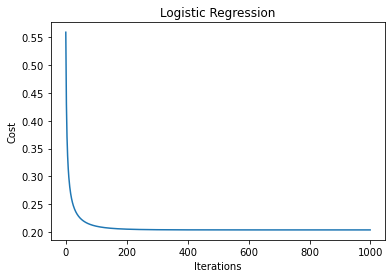


 Accuracy: 0.89


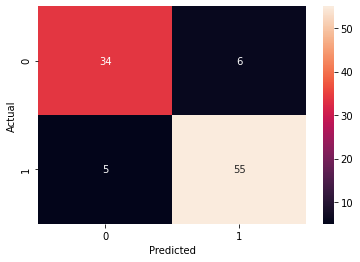

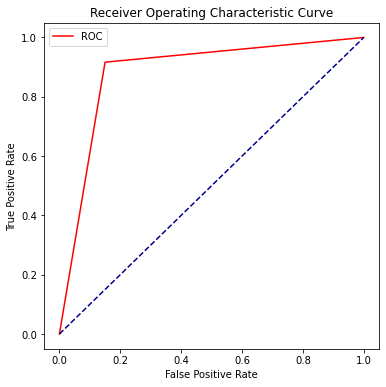

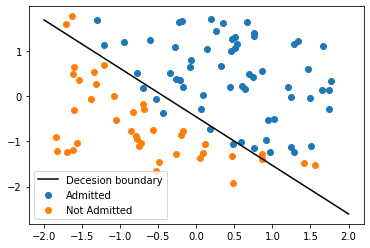

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve

Data = pd.read_csv(r'C:\Users\Hayk\Desktop\Sample2.csv')

X = Data.iloc[:,:-1].values
Y = np.array(Data.iloc[:,2]).reshape(-1,1)
    

X_std = np.copy(X)

mean1=X_std[:,0].mean()
std1=X_std[:,0].std()
mean2=X_std[:,1].mean()
std2=X_std[:,1].std()

X_std[:,0] = (X_std[:,0] - X_std[:,0].mean()) / X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean()) / X_std[:,1].std()




X_b=np.column_stack((np.ones((X_std.shape[0],1)),X_std))


def sigmoid(input):
    return 1 / (1 + np.exp(-input))


def cost_function(theta, x, y):
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(y * np.log(sigmoid(np.dot(x, theta))) + (1 - y) * np.log(1 - sigmoid(np.dot(x, theta))))
    return total_cost

def gradient(theta, x, y):
    m = x.shape[0]
    return np.dot(x.T, (sigmoid(np.dot(x, theta)) - y))


def optimize(x, y,learning_rate=0.01,iterations=1000): 
    size = x.shape[0]
    theta = np.zeros([x.shape[1],1])
    cost=[]

    for i in range(iterations):
        dtheta = gradient(theta, x, y)
        theta =theta - learning_rate * dtheta
        cost.append(cost_function(theta, x, y))
    return cost, theta


solution = optimize(X_b,Y)

print ('\n Logisitc Regression estimated coefficients :', solution[1].T)

cost=solution[0]

print('\n Logisitc Regression estimated cost value:',solution[0][-1])

plt.plot(cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Logistic Regression')
plt.show()

y_pred=sigmoid(np.dot(X_b, solution[1]))

ypred=np.where(y_pred>=0.5,1,0)

g=(Y==ypred).sum()

print('\n Accuracy:',g/X_b.shape[0])

confusion_matrix = pd.crosstab(Y[:,0], ypred[:,0], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

fpr, tpr, thresholds = roc_curve(Y[:,0], ypred[:,0],pos_label=1)
 

#Plotting the figure
plt.figure(figsize = (6,6))
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()


admitted = Data.loc[Y == 1]
not_admitted = Data.loc[Y == 0]

plt.scatter((admitted.iloc[:, 0]- mean1) / std1, (admitted.iloc[:, 1]- mean2) / std2,label='Admitted')
plt.scatter((not_admitted.iloc[:, 0]-mean1) / std1, (not_admitted.iloc[:, 1]- mean2) / std2, label='Not Admitted')


a = -solution[1][1] / solution[1][2]
xx = np.linspace(-2, 2)
yy = a * xx - (solution[1][0]) / solution[1][2]

plt.plot(xx, yy, 'k-',label='Decesion boundary')

plt.legend()
plt.show()
